In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from qtcodes import XZZXQubit
from qiskit import execute, Aer, QuantumCircuit, QuantumRegister

In [3]:
qubit = XZZXQubit()
qubit.reset_z()
qubit.stabilize()
qubit.stabilize()
qubit.x()
qubit.readout_z()

c:\Users\Dustin\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


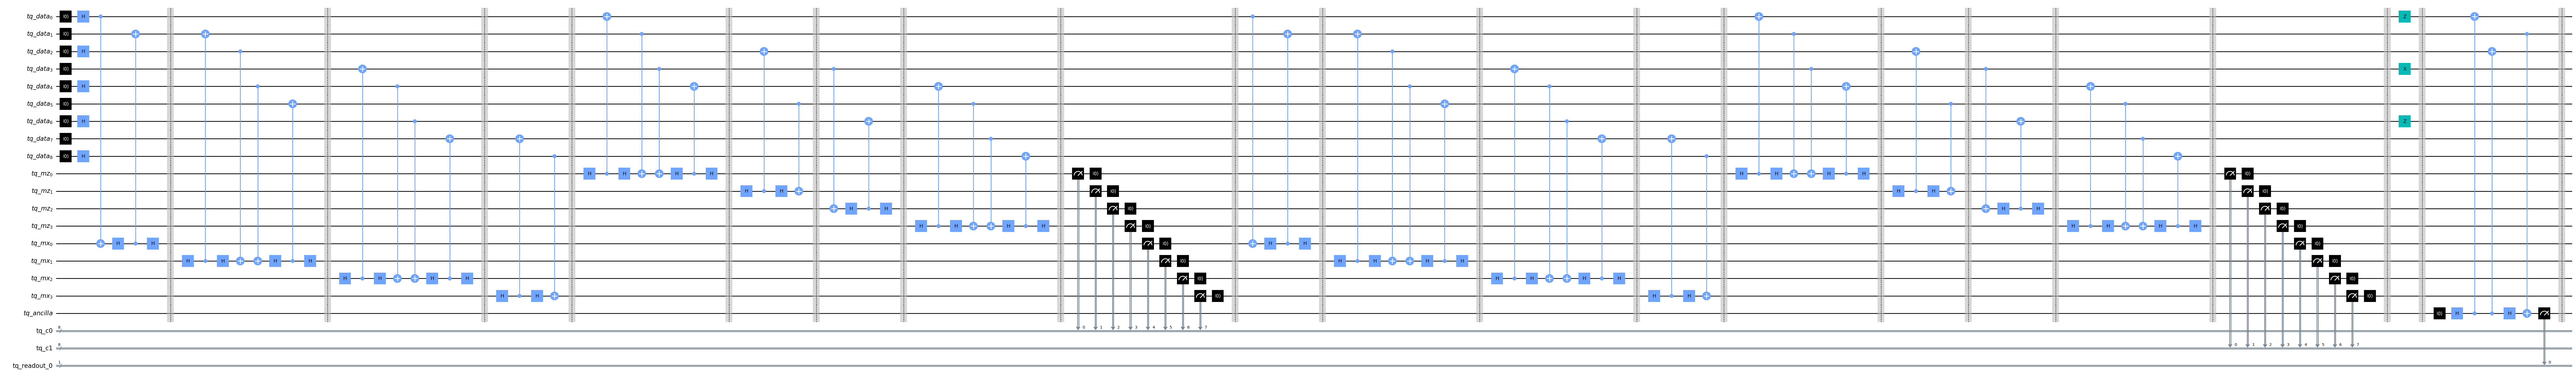

In [4]:
qubit.draw(output='mpl', fold=150)

In [5]:
results = execute(qubit.circ, Aer.get_backend('qasm_simulator'), shots=10000).result().get_counts()
results

{'1 00110000 00110000': 637,
 '1 11000000 11000000': 671,
 '1 01110000 01110000': 642,
 '1 10010000 10010000': 628,
 '1 11010000 11010000': 586,
 '1 10000000 10000000': 626,
 '1 00000000 00000000': 624,
 '1 01000000 01000000': 615,
 '1 00100000 00100000': 634,
 '1 01100000 01100000': 638,
 '1 10110000 10110000': 671,
 '1 11110000 11110000': 595,
 '1 01010000 01010000': 625,
 '1 00010000 00010000': 627,
 '1 10100000 10100000': 613,
 '1 11100000 11100000': 568}

# Lattice Readout

In [6]:
qubit = XZZXQubit({'d':5})
qubit.reset_z()
qubit.stabilize()
qubit.circ.x(0)
qubit.circ.z(0)
qubit.stabilize()
qubit.circ.x(0)
qubit.circ.z(0) #this will not be detected, but that's ok!
qubit.lattice_readout_z()

In [7]:
results = execute(qubit.circ, Aer.get_backend('qasm_simulator'), shots=1).result().get_counts()
readout_string = list(results.keys())[0]
print("Readout String: ", readout_string.split(" ")[0])
logical_readout, syndromes = qubit.parse_readout(readout_string, "Z")
print("Logical Readout: ", logical_readout)
print("Syndromes: \n", syndromes)

TranspilerError: 'Number of qubits (50) in circuit-160 is greater than maximum (30) in the coupling_map'